## Visualizing cost function

### What is a Contour Plot?
- Contour plots is key to grasping how 3D data (like cost functions) gets visualized in 2D.
- A contour plot is a 2D plot.
- X-axis → one variable (e.g., weight w).
- Y-axis → one variable (e.g., bias b)
- Contour lines → represent levels of a third variable (e.g., cost J(w, b))
#### So we need:
- All combinations of w and b (to form a grid)
- The cost at each of those combinations (to draw the contour)


We are gonna plot the cost function $j_{w,b} = \frac{1}{2m}\sum\limits_{1}^{m}(\hat{y}^{(i)} - y^{(i)})^{2} $ against a series of values for w and b in a contour plot

Let's define 3 features and targets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3])
y=np.array([1,4,9])
m=len(x)
print(f"x: {x}\ny: {y}\nm: {3}")

x: [1 2 3]
y: [1 4 9]
m: 3


### Why Use meshgrid?
```bash
w_vals = [-1, 0, 1]
b_vals = [0, 1, 2]
```
- We just have 3 values.
- But that’s not enough to compute all pairwise combinations unless you manually loop over all (w, b) pairs.

### With meshgrid:
```bash
W, B = np.meshgrid(w_vals, b_vals)
```
- W: a 2D grid where each row is w_vals
- B: a 2D grid where each column is b_vals

#### Together, they form a grid of every (w, b) pair. That allows you to:
- Compute the cost J(w, b) for every grid point
- Store the result in a 2D array J
- Pass W, B, and J to plt.contour(W, B, J)

#### This is an example of meshgrid with limited data to understand the cocept

In [5]:
# Define a grid of w and b values (broader range to see the shape)
# np.linspace(start, stop, num_points) creates an array of evenly spaced values.
w_vals = np.linspace(-20, 20, 5)
b_vals = np.linspace(0, 20, 5)

print(f"The linespace values of \nw: {w_vals}\nb: {b_vals}")

# Create two 2D arrays representing all combinations of w and b.
W, B = np.meshgrid(w_vals,b_vals)
# W and B are both shape (5,5).

print(f"The meshgrid value: {W,B}")

The linespace values of 
w: [-20. -10.   0.  10.  20.]
b: [ 0.  5. 10. 15. 20.]
The meshgrid value: (array([[-20., -10.,   0.,  10.,  20.],
       [-20., -10.,   0.,  10.,  20.],
       [-20., -10.,   0.,  10.,  20.],
       [-20., -10.,   0.,  10.,  20.],
       [-20., -10.,   0.,  10.,  20.]]), array([[ 0.,  0.,  0.,  0.,  0.],
       [ 5.,  5.,  5.,  5.,  5.],
       [10., 10., 10., 10., 10.],
       [15., 15., 15., 15., 15.],
       [20., 20., 20., 20., 20.]]))


### Now let's create meshgrid for our training set.

In [6]:
w_vals = np.linspace(-20, 20, 100)
b_vals = np.linspace(0, 20, 100)

# create meshgrid for plotting
W, B = np.meshgrid(w_vals,b_vals)
Jwb = np.zeros_like(W)

Compute cost for each (w, b) pair


In [7]:
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        w=W[i,j]
        b=B[i,j]
        
        ycap= w*x + b #Performs vecotorized operation on x, cause numpy array
        
        Jwb[i,j]=np.sum((ycap-y)**2)/(2*m) # #Performs vecotorized operation on y, cause numpy array

Plot the contour

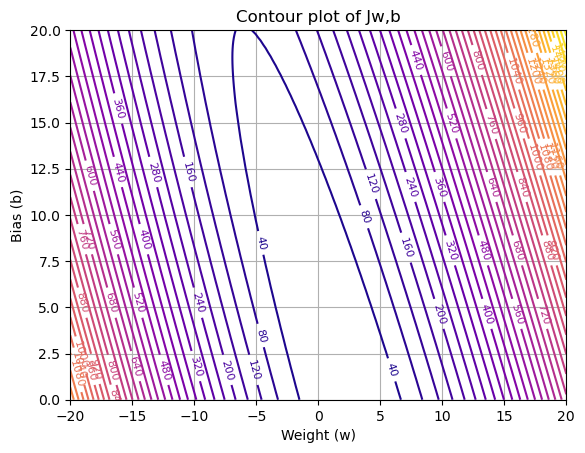

In [14]:
# Creates a new figure (plotting window) with size 10x6 inches.
# plt.figure(figsize=(10,6))

# this object cp contains all contour information (for labeling, color bar, etc.).
# levels=50: draw 50 contour lines (more lines = smoother plot).
# cmap='plasma': use the "plasma" colormap (yellow–purple gradient).
cp=plt.contour(W,B,Jwb,levels=40,cmap='plasma')

# Adds labels to the contour lines (shows numerical cost values on the plot).
# inline=True: labels are drawn inside the lines.
# fontsize=8: makes labels small and tidy.
plt.clabel(cp,inline=True,fontsize=8)

plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Contour plot of Jw,b')
plt.grid(True)
plt.show()

### Wonder How a 3D graph would look?

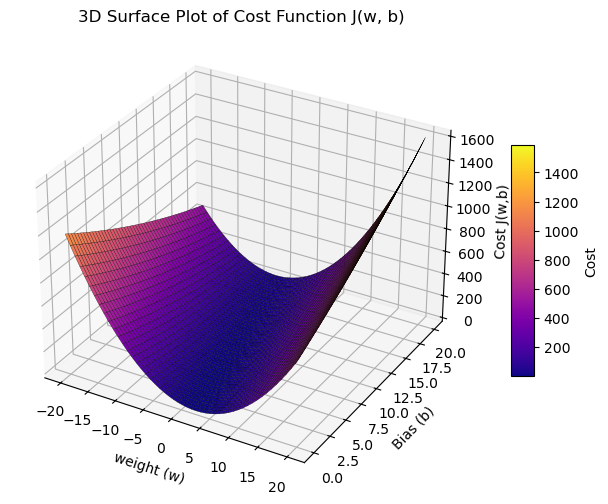

In [15]:
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

fig=plt.figure(figsize=(10,6))

# fig.add_subplot(111) creates 1 subplot in a 1×1 grid (i.e., a single plot).
# projection='3d' turns this subplot into a 3D plot instead of the default 2D.
# ax now holds a 3D axes object, and you can use it to draw 3D plots like surfaces, wireframes, and scatter plots.
ax=fig.add_subplot(111,projection='3d')

# cmap='plasma': Sets the color gradient (you can use 'viridis', 'coolwarm', 'inferno', etc.)
# edgecolor='k': Colors the edges of the surface polygons in black ('k') for better visibility
# linewidth=0.2: Controls thickness of those edge lines
# antialiased=True: Smooths the surface to reduce visual jaggies
surf=ax.plot_surface(W,B,Jwb,cmap='plasma',edgecolor='k',linewidth=0.2,antialiased=True)
# The variable surf stores the surface object returned by plot_surface.

ax.set_xlabel('weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost J(w,b)')

ax.set_title('3D Surface Plot of Cost Function J(w, b)')

# ax=ax: Attaches the color bar to the same axes (ax) where the 3D plot is drawn.
# shrink=0.5: Shrinks the height of the color bar to 50% of its default size. Useful for fitting the plot layout nicely.
# aspcet=10: Controls the thickness of the color bar. Higher numbers = thinner bar.
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Cost')
# A colorbar is essential in a 3D surface plot when using a colormap (cmap='plasma') because:
# It shows the mapping between color and cost.
# Viewers can easily tell how high or low the cost is at different parts of the surface.
plt.show()